<a href="https://colab.research.google.com/github/himanshu-singh0527/enhanced-malaria-detection-using-cnn-and-deep-learning-techniques/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [ ]:
base_dir = r'/content/drive/MyDrive/Malaria_Detection/Dataset'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # For binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# Create the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification


Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/416 ━━━━━━━━━━━━━━━━━━━━ 17:54 3s/step - accuracy: 0.4759 - loss: 0.7067

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


416/416 ━━━━━━━━━━━━━━━━━━━━ 128s 195ms/step - accuracy: 0.4549 - loss: 0.7050 - val_accuracy: 0.6791 - val_loss: 0.6886
Epoch 2/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6233 - loss: 0.6726 - val_accuracy: 0.3284 - val_loss: 0.7920
Epoch 3/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6129 - loss: 0.7271 - val_accuracy: 0.3209 - val_loss: 0.7469
Epoch 4/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5521 - loss: 0.6663 - val_accuracy: 0.3582 - val_loss: 0.7088
Epoch 5/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7446 - loss: 0.5327 - val_accuracy: 0.4851 - val_loss: 0.9525
Epoch 6/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8321 - loss: 0.3936 - val_accuracy: 0.7015 - val_loss: 0.5857
Epoch 7/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8763 - loss: 0.3045 - val_accuracy: 0.7537 - val_loss: 0.5272
Epoch 8/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9155 - loss: 0.2718 - val_accuracy: 0.8731 - 

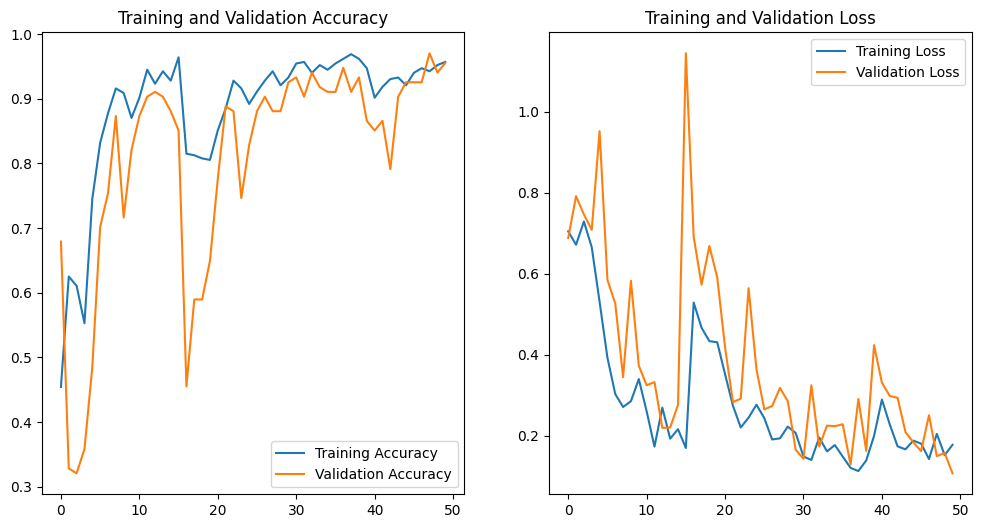

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot metrics
plot_metrics(history)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


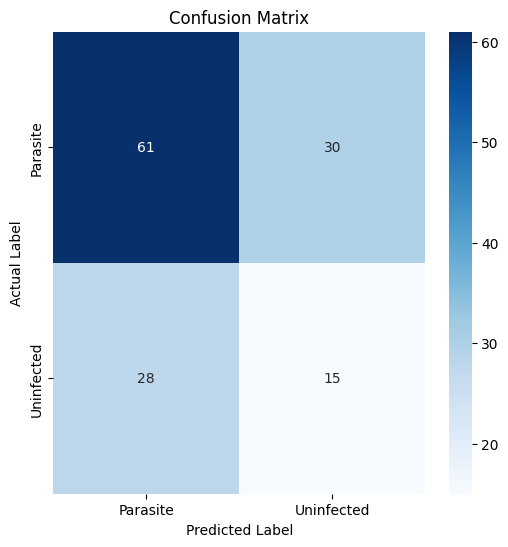

              precision    recall  f1-score   support

    Parasite       0.69      0.67      0.68        91
  Uninfected       0.33      0.35      0.34        43

    accuracy                           0.57       134
   macro avg       0.51      0.51      0.51       134
weighted avg       0.57      0.57      0.57       134



In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

validation_generator.reset()

predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())


conf_matrix = confusion_matrix(true_classes, predicted_classes)


plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [ ]:
!ls

MyDrive


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
# Correct file path with .h5 extension
model.save('/content/drive/MyDrive/malaria_detection_cnn.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


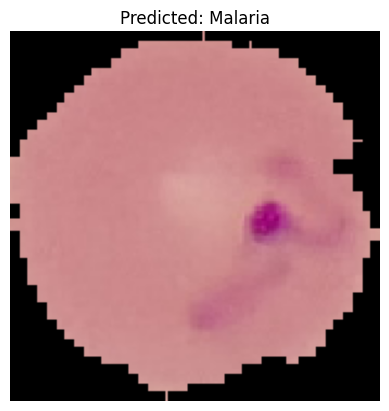

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


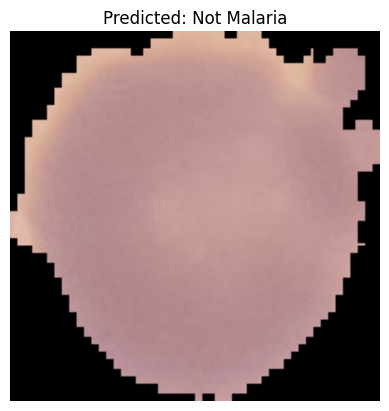

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model = load_model(r'/content/drive/MyDrive/Malaria_Detection/malaria_detection_cnn.h5')

image_path = r'/content/drive/MyDrive/Malaria_Detection/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_111.png'

img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

if prediction > 0.5:
    result = "Predicted: Not Malaria"
else:
    result = "Predicted: Malaria"

plt.imshow(img)
plt.title(result)
plt.axis('off')
plt.show()


image_path = r'/content/drive/MyDrive/Malaria_Detection/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_143.png'

img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

if prediction > 0.5:
    result = "Predicted: Not Malaria"
else:
    result = "Predicted: Malaria"

plt.imshow(img)
plt.title(result)
plt.axis('off')
plt.show()